# A1.2 Regresión lineal simple

**1. Importa los datos del archivo “Felicidad y GDP.csv” a tu ambiente de trabajo. Por curiosidad, revisemos cuáles son los países más felices, así como los que tienen mayor GDP. Imprime en consola un resumen de 10 filas de la base de datos, previamente ordenada de mayor a menor felicidad. Te recomiendo que hagas uso de la función “sort_values()”, especificando como primer parámetro el nombre de la columna de interés, y el parámetro “ascending” con valor “False”. Repite el proceso, pero ahora ordenando la base de datos de mayor a menor GDP.**

In [39]:
# Paso 1: Importar bibliotecas necesarias e importar los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.api import OLS, add_constant

# Cargar el archivo CSV
data = pd.read_csv("A1.2 Felicidad y GDP.csv")

# Resumen ordenado por felicidad (mayor a menor)
data_sorted_happiness = data.sort_values(by="Felicidad", ascending=False)
print("Top 10 países por nivel de felicidad:\n", data_sorted_happiness.head(10))

# Resumen ordenado por GDP (mayor a menor)
data_sorted_gdp = data.sort_values(by="GDP", ascending=False)
print("Top 10 países por GDP:\n", data_sorted_gdp.head(10))

Top 10 países por nivel de felicidad:
           Pais  Felicidad           GDP
0      Finland     7.8210  2.718370e+11
1      Denmark     7.6362  3.560850e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.522480e+11
4  Netherlands     7.4149  9.138650e+11
5   Luxembourg     7.4040  7.335313e+10
6       Sweden     7.3843  5.414870e+11
7       Norway     7.3651  3.621980e+11
8       Israel     7.3638  4.071010e+11
9  New Zealand     7.1998  2.117350e+11
Top 10 países por GDP:
                Pais  Felicidad           GDP
15    United States     6.9768  2.089370e+13
70            China     5.5853  1.468770e+13
52            Japan     6.0389  5.040110e+12
13          Germany     7.0341  3.846410e+12
16   United Kingdom     6.9425  2.756900e+12
130           India     3.7771  2.667690e+12
19           France     6.6867  2.630320e+12
29            Italy     6.4667  1.892570e+12
14           Canada     7.0251  1.645420e+12
57      South Korea     5.9351  1.637900e+12


**2. Grafica las observaciones, definiendo el valor de “y” como el nivel de felicidad y el valor de “x” como el logaritmo base 10 del GDP. Típicamente, cuando trabajamos con números tan grandes como lo es el GDP, es mucho más común encontrar asociaciones con el logaritmo base 10 de la variable, que con la variable misma. Esto no es un problema, siempre y cuando nuestra conclusión incluya este recordatorio. Es decir, si descubrimos que sí existe una asociación, diríamos que: “encontramos una asociación estadísticamente significativa entre los niveles de felicidad y el logaritmo base 10 del GDP”. La librería numpy tiene la función “log10()”, puedes usarla para transformar el GDP.**

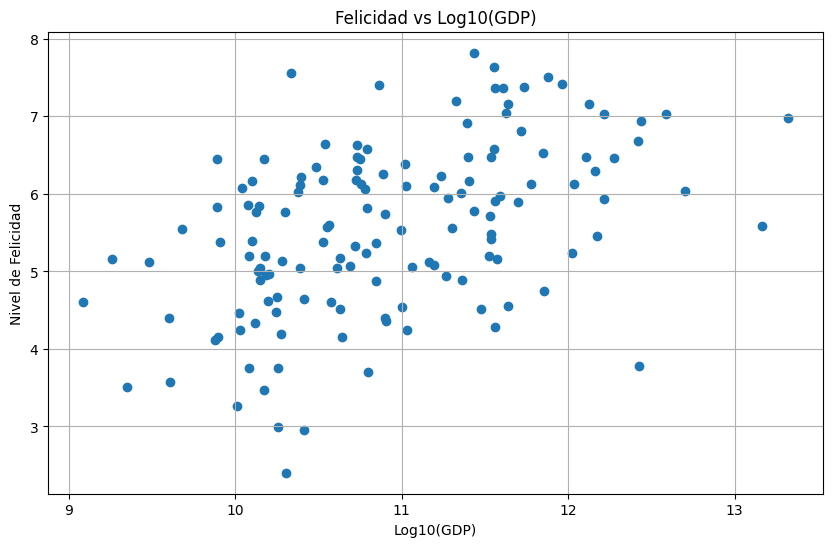

In [40]:
# Paso 2: Graficar felicidad vs log10(GDP)
x = np.log10(data["GDP"])
plt.figure(figsize=(10, 6))
plt.scatter(x, data["Felicidad"])
plt.title("Felicidad vs Log10(GDP)")
plt.xlabel("Log10(GDP)")
plt.ylabel("Nivel de Felicidad")
plt.grid(True)
plt.show()

**3. Calcula los valores óptimos de los dos coeficientes del modelo de regresión lineal simple. Realiza este proceso “a mano”, sin apoyarte con funciones preestablecidas de librerías de análisis de datos. Al finalizar, imprime en consola ambos valores. Siempre es bueno especificar qué es el valor que estamos imprimiendo, por lo que te recomiendo usar una sintaxis similar a: print(“B1 =”, B1).**


In [41]:
# Paso 3: Calcular coeficientes del modelo de regresión lineal manualmente
y = data["Felicidad"]

# Calcular promedios
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calcular coeficientes
B1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
B0 = y_mean - B1 * x_mean

print("B1 =", B1)
print("B0 =", B0)

B1 = 0.628128465881041
B0 = -1.3023500570747295


**4. Realiza una nueva gráfica en la que se muestren tanto las observaciones, como la línea que representa el modelo de regresión lineal simple. Te recomiendo usar un valor de transparencia de 0.75, tanto para las observaciones como para la línea.**


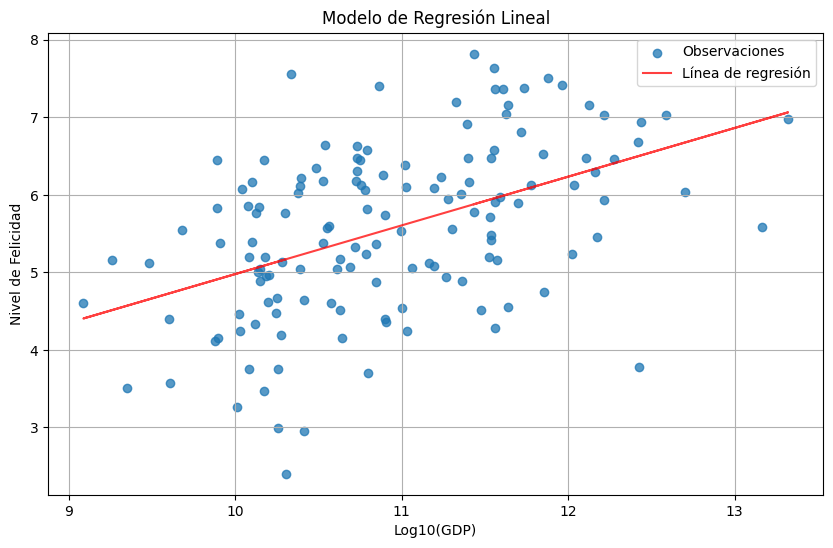

In [42]:
# Paso 4: Graficar modelo y observaciones
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.75, label="Observaciones")
plt.plot(x, B0 + B1 * x, color="red", alpha=0.75, label="Línea de regresión")
plt.title("Modelo de Regresión Lineal")
plt.xlabel("Log10(GDP)")
plt.ylabel("Nivel de Felicidad")
plt.legend()
plt.grid(True)
plt.show()


**5. Calcula el RSS del modelo e imprímelo en la consola.**

In [43]:
# Paso 5: Calcular RSS
rss = np.sum((y - (B0 + B1 * x)) ** 2)
print("RSS =", rss)

RSS = 131.3738317732635


**6. Calcula el error estándar e intervalo de confianza de 𝛽̂1, e imprime dichos valores en la consola. Siempre es bueno especificar qué es el valor que estamos imprimiendo, por lo que te recomiendo usar una sintaxis similar a: print(“SE =”, SE). Asimismo, determina si la asociación entre la felicidad y el GDP es significativa en esta población, imprimiendo en consola un mensaje que claramente explique el por qué de la afirmación, evidenciado por alguna métrica calculada**

In [44]:
# Paso 6: Calcular error estándar y verificar significancia
n = len(y)
se = np.sqrt(rss / (n - 2)) / np.sqrt(np.sum((x - x_mean) ** 2))
conf_interval = [B1 - 1.96 * se, B1 + 1.96 * se]

print("SE =", se)
print("Intervalo de confianza para B1 =", conf_interval[0],"-", conf_interval[1])

if conf_interval[0] > 0 or conf_interval[1] < 0:
    print("La asociación entre felicidad y log10(GDP) es significativa.")
else:
    print("La asociación entre felicidad y log10(GDP) NO es significativa.")

SE = 0.09983378435340727
Intervalo de confianza para B1 = 0.43245424854836273 - 0.8238026832137193
La asociación entre felicidad y log10(GDP) es significativa.


**7. Calcula el residual standard error y la 𝑅2 del modelo, e imprime dichos valores en la consola. Para el cálculo de 𝑅2, te recomiendo primero calcular el total sum of squares, o TSS. Para el cálculo del mismo, pon mucha atención al orden de los paréntesis, pues no es lo mismo sumar el cuadrado de múltiples valores, que sumar múltiples valores y elevar el resultado al cuadrado. Adicionalmente, agrega un comentario, imprimiéndolo en consola, sobre tu opinión del valor de 𝑅2 obtenido con el modelo.**

In [45]:
# Paso 7: Calcular RSE y R^2
y_pred = B0 + B1 * x
tss = np.sum((y - y_mean) ** 2)
residual_standard_error = np.sqrt(rss / (n - 2))
r2 = 1 - (rss / tss)

print("RSE =", residual_standard_error)
print("R^2 =", r2)
print("El valor de R^2 indica que el modelo explica el", r2 * 100, "% de la variabilidad en los niveles de felicidad.")

RSE = 0.9721807858537376
R^2 = 0.22166361654970657
El valor de R^2 indica que el modelo explica el 22.166361654970657 % de la variabilidad en los niveles de felicidad.


**8. Finalmente, usa la función “OLS()” de la librería statsmodels.api para verificar que los resultados de todos los puntos anteriores son los esperados. Si el resumen de los resultados te entrega un p-value = 0.000, puedes observar el resultado con muchas más cifras significativas usando la función “pvalues” de la misma librería. Por ejemplo: si los resultados de ajustar el modelo los almacenaste en una variable de nombre “var”, puedes usar la siguiente sintaxis: var.pvalues. Por default, el RSE no se muestra en el resumen, para revisarlo utiliza la línea de código print(var.scale ** .5), de nuevo asumiendo que almacenaste el resultado en una variable de nombre “var”.**

In [46]:
# Paso 8: Verificar con statsmodels
X = add_constant(x)  # Agregar término constante
model = OLS(y, X).fit()
print(model.summary())
print("Valores p:\n", model.pvalues)
print("RSE desde statsmodels:", model.scale ** 0.5)


                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           3.83e-09
Time:                        00:09:52   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2

**Firma de honor:**  "Doy mi palabra que he realizado esta actividad con integridad académica" - Daniel Matthieu Potes Lesoinne #584678